In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# %load_ext autoreload
# %autoreload 2
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks") # Colab Notebooks 폴더에 있는 모듈을 불러올 수 있도록 경로 추가
from multiclass_functions1_9 import * # 함수들 불러오기
import torch
from torch import nn, optim
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cuda


# 셀 역할을 구분하여 코딩하자!

In [ ]:
### Set Hyperparameters ###

BATCH_SIZE = 32
LR = 1e-3
EPOCH = 5 
criterion = nn.CrossEntropyLoss()
new_model_train = True # 선언하는 이유 : 모델을 처음부터 학습시킬지, 기존에 학습된 모델을 불러와서 학습시킬지 결정하기 위함
model_type = "MLP"
dataset = "MNIST"
save_model_path = f"/content/drive/MyDrive/Colab Notebooks/results/{model_type}_{dataset}.pt"

In [ ]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = "/content/drive/MyDrive/Colab Notebooks/data", train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = "/content/drive/MyDrive/Colab Notebooks/data", train=False, download=True, transform=transform)
train_DL = torch.utils.data.DataLoader(train_DS, batch_size = BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size = BATCH_SIZE, shuffle=True)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(28*28, 100),
                                    nn.ReLU(),
                                    nn.Linear(100, 10))
        
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x

In [ ]:
model=MLP().to(DEVICE)
print(model)
x_batch, _ = next(iter(train_DL))
print(model(x_batch.to(DEVICE)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


Epoch: 1, train loss: 0.314
--------------------
Epoch: 2, train loss: 0.143
--------------------
Epoch: 3, train loss: 0.099
--------------------
Epoch: 4, train loss: 0.075
--------------------
Epoch: 5, train loss: 0.059
--------------------


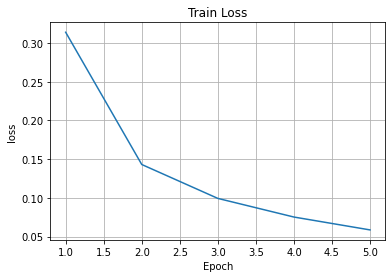

In [ ]:
if new_model_train: # 새로운 모델을 학습시킬 때, True로 설정
    optimizer = optim.Adam(model.parameters(), lr=LR)
    loss_history = Train(model, train_DL, criterion, optimizer, EPOCH)

    torch.save(model, save_model_path)

    plt.plot(range(1,EPOCH+1),loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.title("Train Loss")
    plt.grid()

In [ ]:
load_model = torch.load(save_model_path, map_location=DEVICE)

In [ ]:
Test(load_model, test_DL)
print(count_params(load_model))

Test accuracy: 9763/10000 (97.6 %)
79510


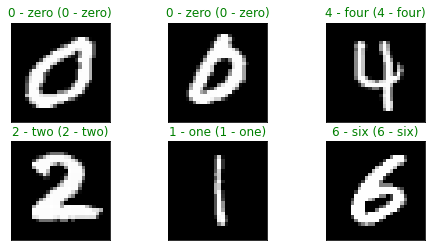

In [ ]:
Test_plot(load_model, test_DL)